In [1]:
import pandas as pd

In [2]:
# load pre-processed dataset
df = pd.read_csv('../../datasets/pre_processed_dataset.csv')
df.sample(3)

,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_basil,item_name_bell pepper,item_name_big broccoli,item_name_black chicken fir bacteria,...,item_name_yuxingcao,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
313,0.508108,23.8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2379,0.169000,16.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
977,0.369000,16.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# define dependent and non dependent variables
y = df['quantity_sold_kg']
x = df.drop(columns=['quantity_sold_kg'], axis=1)

# split the dataset 0.8, 0.1, 0.1
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

"""use float32 data type for numerical values to reduce memory usage and improve performance"""

# convert to tensor arrays
x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
x_eval_tensor = tf.constant(x_eval, dtype=tf.float32)
y_eval_tensor = tf.constant(y_eval, dtype=tf.float32)

x_train_tensor.shape, x_eval_tensor.shape, x_test.shape

2024-03-31 15:00:34.117998: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-31 15:00:34.118026: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-31 15:00:34.118033: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-31 15:00:34.118291: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-31 15:00:34.118308: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([5106, 131]), TensorShape([638, 131]), (639, 131))

In [5]:
# save testing dataset
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('../../datasets/testing_dataset.csv')
df_test.sample(3)

,quantity_sold_kg,unit_selling_price_rmb/kg,item_name_7 colour pepper,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_basil,item_name_bell pepper,item_name_big broccoli,item_name_black chicken fir bacteria,...,item_name_yuxingcao,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai,category_name_aquatic,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum
412,1.0,2.72,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
188,1.0,13.90,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
245,1.0,2.50,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [6]:
# convert to tensor arrays
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [9]:
from sklearn.metrics import mean_absolute_error

In [10]:
# Training set
train_pred = model.predict(x_train)
train_error = mean_absolute_error(y_train, train_pred)

# Testing set
test_pred = model.predict(x_test)
test_error = mean_absolute_error(y_test, test_pred)

print(f'Training Error: {train_error}')
print(f'Testing Error: {test_error}')

Training Error: 0.03984433383582502
Testing Error: 0.046361680407821286


In [11]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

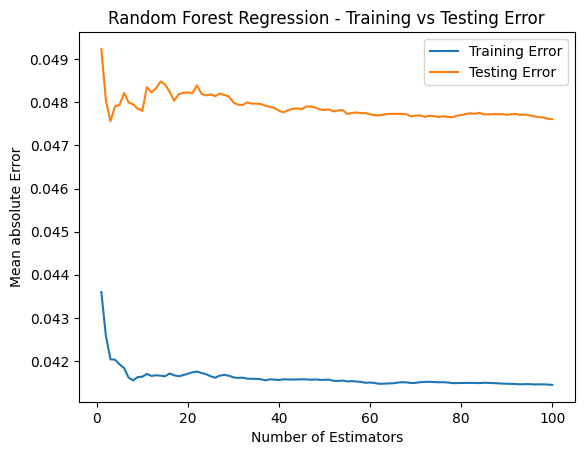

In [12]:
train_errors = []
test_errors = []

for i in range(1, 101):
    model = RandomForestRegressor(n_estimators=i, random_state=42)
    model.fit(x_train, y_train)
    
    # Training set
    train_pred = model.predict(x_train)
    train_error = mean_absolute_error(y_train, train_pred)
    train_errors.append(train_error)

    # Testing set
    test_pred = model.predict(x_test)
    test_error = mean_absolute_error(y_test, test_pred)
    test_errors.append(test_error)

# Plotting the results
plt.plot(range(1, 101), train_errors, label='Training Error')
plt.plot(range(1, 101), test_errors, label='Testing Error')
plt.title('Random Forest Regression - Training vs Testing Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean absolute Error')
plt.legend(loc='upper right')

In [13]:
# model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(x_train_tensor.shape[1], input_shape=(x_train_tensor.shape[1],)))
model.add(tf.keras.layers.Reshape((1, x_train_tensor.shape[1]))) 
model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Dense(64, activation='tanh'))
model.add(tf.keras.layers.Reshape((1, 64))) 
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(4, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 50

# train model and get history
history = model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


2024-03-31 15:01:26.443553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.4402 - mae: 0.4402 - val_loss: 0.2511 - val_mae: 0.2512
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2173 - mae: 0.2173 - val_loss: 0.1477 - val_mae: 0.1478
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1484 - mae: 0.1484 - val_loss: 0.1340 - val_mae: 0.1340
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1298 - mae: 0.1298 - val_loss: 0.1079 - val_mae: 0.1079
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1032 - mae: 0.1032 - val_loss: 0.0751 - val_mae: 0.0751
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0773 - mae: 0.0773 - val_loss: 0.0665 - val_mae: 0.0665
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0672 - mae: 0.0672 - val_loss: 0.0635 - val_mae: 0.0635
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0652 - mae: 0.0652 - val_loss: 0.0594 - val_mae: 0.0594
Epoch 9/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss

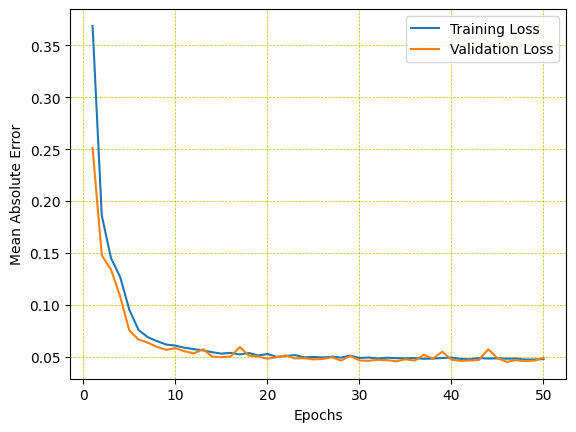

In [14]:
# plot loss with respect to epoch number
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(x_range, loss, label='Training Loss')
plt.plot(x_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.grid(True, linewidth = 0.5, color = 'y', linestyle = '--')

In [15]:
# final_model
final_model = tf.keras.Sequential()
final_model.add(tf.keras.layers.Dense(x_train_tensor.shape[1], input_shape=(x_train_tensor.shape[1],)))
final_model.add(tf.keras.layers.Reshape((1, x_train_tensor.shape[1]))) 
final_model.add(tf.keras.layers.LSTM(128))
final_model.add(tf.keras.layers.Dense(64, activation='tanh'))
final_model.add(tf.keras.layers.Reshape((1, 64))) 
final_model.add(tf.keras.layers.LSTM(16))
final_model.add(tf.keras.layers.Dense(4, activation='tanh'))
final_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile final_model
final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 32

# train final_model and get history
history = final_model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/32


/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.4302 - mae: 0.4302 - val_loss: 0.2262 - val_mae: 0.2262
Epoch 2/32
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1919 - mae: 0.1919 - val_loss: 0.1440 - val_mae: 0.1441
Epoch 3/32
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1454 - mae: 0.1454 - val_loss: 0.1239 - val_mae: 0.1239
Epoch 4/32
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1169 - mae: 0.1169 - val_loss: 0.0934 - val_mae: 0.0934
Epoch 5/32
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0953 - mae: 0.0953 - val_loss: 0.0689 - val_mae: 0.0688
Epoch 6/32
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0744 - mae: 0.0744 - val_loss: 0.0659 - val_mae: 0.0659
Epoch 7/32
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0675 - mae: 0.0675 - val_loss: 0.0599 - val_mae: 0.0599
Epoch 8/32
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0630 - mae: 0.0630 - val_loss: 0.0578 - val_mae: 0.0578
Epoch 9/32
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss

In [16]:
final_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 131)            │        17,292 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 1, 131)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 16)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491,777 (1.88 MB)

 Trainable params: 163,925 (640.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 327,852 (1.25 MB)

In [17]:
# view loss for testing values
final_model.evaluate(x_test_tensor, y_test_tensor)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0561 - mae: 0.0561


[0.049943707883358, 0.049960874021053314]

In [18]:
# predict sample value set
y_predictions = final_model.predict(x_test_tensor)
y_predictions[:5]

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[0.563223  ],
       [0.20344204],
       [1.0193433 ],
       [1.0082142 ],
       [0.31402642]], dtype=float32)

In [19]:
# view actual values
y_test_tensor[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.7467143, 0.176    , 1.       , 1.       , 0.38     ],
      dtype=float32)>

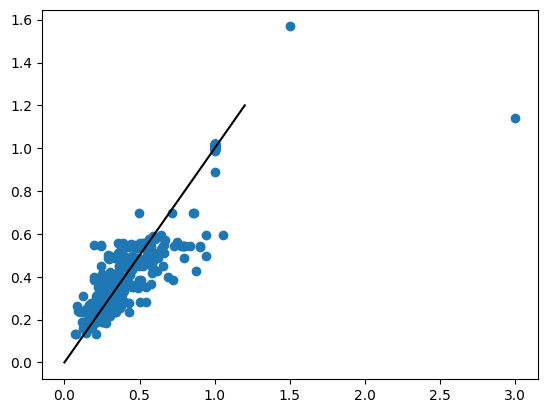

In [20]:
x = [0 , 1.2]
y = x

plt.scatter(y_test_tensor, y_predictions)
plt.plot(x, y, color='black')

In [21]:
# save final model
final_model.save('sales_prediction_model.keras')